In [380]:
# !pip install -r requirements.txt

In [381]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/petfinder-mini.csv')
df.head(10)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2
5,Cat,3,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,This is a stray kitten that came to my house. ...,2,2
6,Cat,12,Domestic Long Hair,Male,Black,No Color,Medium,Long,No,Not Sure,Healthy,300,anyone within the area of ipoh or taiping who ...,3,1
7,Cat,2,Domestic Medium Hair,Female,Gray,No Color,Medium,Medium,No,No,Healthy,0,"healthy and active, feisty kitten found in nei...",6,1
8,Cat,12,Domestic Medium Hair,Female,Black,White,Medium,Medium,Not Sure,Not Sure,Healthy,0,"Very manja and gentle stray cat found, we woul...",2,4
9,Dog,2,Mixed Breed,Male,Black,Brown,Medium,Short,No,No,Healthy,0,"For serious adopter, please do sms or call for...",7,1


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [383]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
# df.select_dtypes(include=[np.number]).columns.tolist() 

In [384]:
category_columns = df.select_dtypes(include=['object']).columns.tolist()
category_columns

['Type',
 'Breed1',
 'Gender',
 'Color1',
 'Color2',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Sterilized',
 'Health',
 'Description']

In [385]:
for col in df.columns.tolist():
    # print(col)
    print(f"{col}:{df[col].astype('category').cat.codes.nunique()}")

Type:2
Age:105
Breed1:166
Gender:2
Color1:7
Color2:7
MaturitySize:3
FurLength:3
Vaccinated:3
Sterilized:3
Health:3
Fee:65
Description:10692
PhotoAmt:31
AdoptionSpeed:5


In [386]:
from datetime import datetime
from math import exp
from collections import defaultdict

# Manage data and statistics
import numpy as np
from numpy.random import default_rng, SeedSequence
import pandas as pd
from pandas.api.types import CategoricalDtype

from scipy import stats
from scipy.special import expit, logit
from scipy.stats.mstats import winsorize
from scipy.interpolate import interp1d, make_interp_spline, BSpline

# Plot data
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
mpl.style.use('tableau-colorblind10')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

from IPython.display import HTML, Image, display, Markdown as md

# statsmodels
import patsy
from patsy import dmatrices
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# scikit-learn
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [387]:
petfinder = pd.read_csv('data/petfinder-mini.csv')

In [388]:
petfinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           11537 non-null  object
 1   Age            11537 non-null  int64 
 2   Breed1         11537 non-null  object
 3   Gender         11537 non-null  object
 4   Color1         11537 non-null  object
 5   Color2         11537 non-null  object
 6   MaturitySize   11537 non-null  object
 7   FurLength      11537 non-null  object
 8   Vaccinated     11537 non-null  object
 9   Sterilized     11537 non-null  object
 10  Health         11537 non-null  object
 11  Fee            11537 non-null  int64 
 12  Description    11528 non-null  object
 13  PhotoAmt       11537 non-null  int64 
 14  AdoptionSpeed  11537 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [389]:
petfinder.shape

(11537, 15)

In [390]:
petfinder.dtypes

Type             object
Age               int64
Breed1           object
Gender           object
Color1           object
Color2           object
MaturitySize     object
FurLength        object
Vaccinated       object
Sterilized       object
Health           object
Fee               int64
Description      object
PhotoAmt          int64
AdoptionSpeed     int64
dtype: object

In [391]:
petfinder.select_dtypes(include=np.number).columns.tolist()

['Age', 'Fee', 'PhotoAmt', 'AdoptionSpeed']

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Fee'}>],
       [<Axes: title={'center': 'PhotoAmt'}>,
        <Axes: title={'center': 'AdoptionSpeed'}>]], dtype=object)

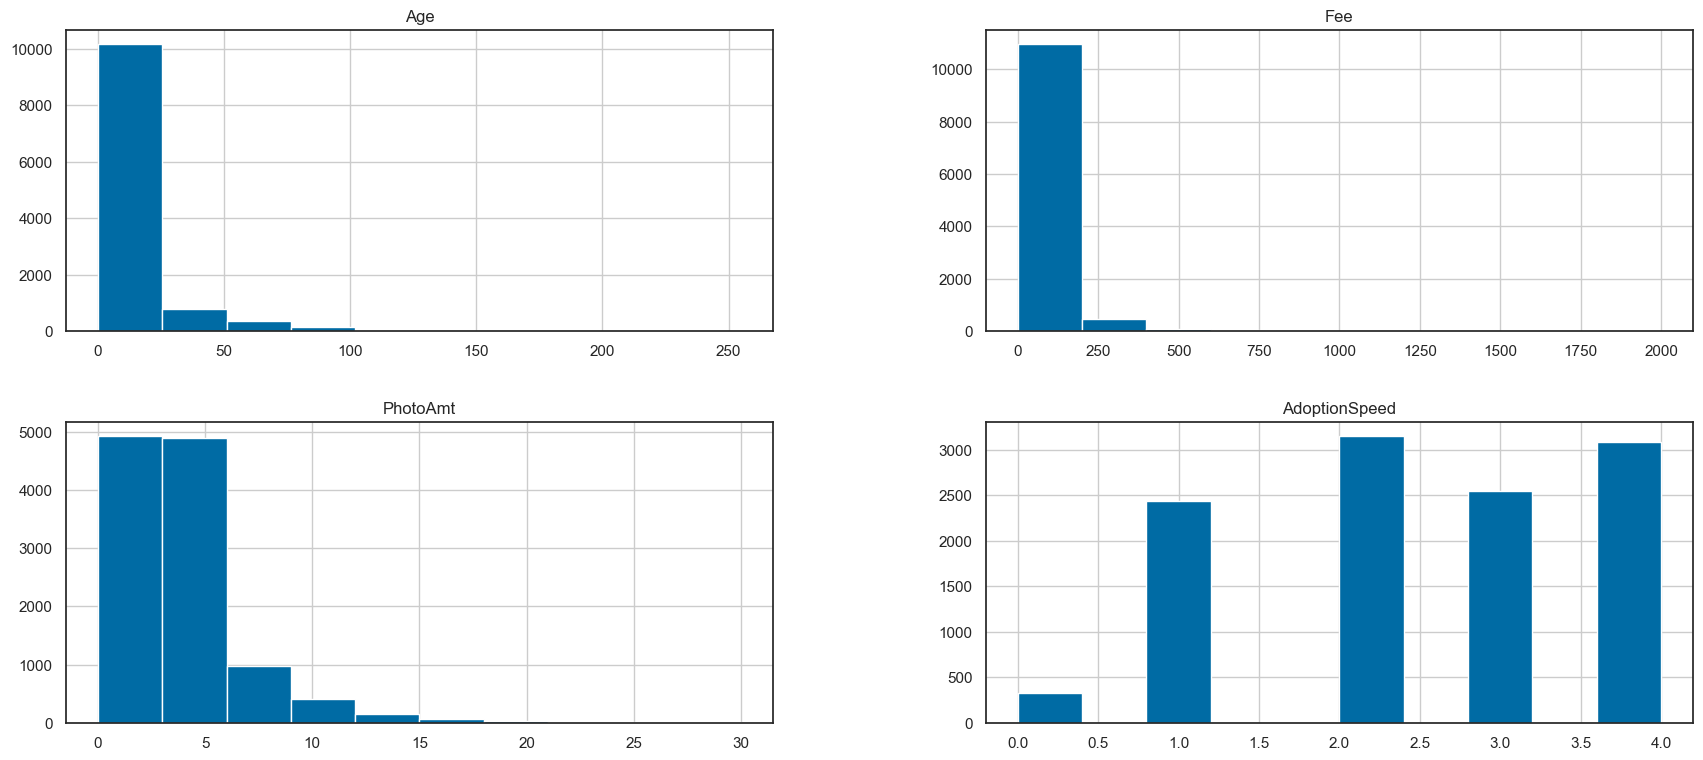

In [392]:
petfinder.hist(figsize=(21,9))

In [393]:
petfinder.describe()

,Age,Fee,PhotoAmt,AdoptionSpeed
count,11537.000000,11537.000000,11537.000000,11537.000000
mean,11.743434,23.957268,3.610211,2.486522
std,19.324221,80.024226,3.145872,1.173275
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000
50%,4.000000,0.000000,3.000000,2.000000
75%,12.000000,0.000000,5.000000,4.000000
max,255.000000,2000.000000,30.000000,4.000000


In [394]:
petfinder.isna().sum()

Type             0
Age              0
Breed1           0
Gender           0
Color1           0
Color2           0
MaturitySize     0
FurLength        0
Vaccinated       0
Sterilized       0
Health           0
Fee              0
Description      9
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

In [395]:
petfinder['Adopted'] = np.where(petfinder['AdoptionSpeed']==4, 0, 1)

petfinder = petfinder.drop(columns=['AdoptionSpeed', 'Description'])
petfinder

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Adopted
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,1
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,1
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,1
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,1
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,0


In [396]:
features = petfinder.copy()
labels = features.pop('Adopted')

features.columns.tolist()


['Type',
 'Age',
 'Breed1',
 'Gender',
 'Color1',
 'Color2',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Sterilized',
 'Health',
 'Fee',
 'PhotoAmt']

In [397]:
features['Is_Cat'] = np.where(features['Type']=='Dog', 0., 1.)
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Is_Cat
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,0.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,0.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,0.0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,1.0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,0.0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,1.0


In [398]:
features['Is_Female'] = np.where(features['Gender']=='Male', 0., 1.)
features

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Is_Cat,Is_Female
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1.0,0.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,0.0,0.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,0.0,1.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,0.0,0.0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,1.0,1.0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,0.0,1.0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,1.0,1.0


In [399]:
features['Vaccinated'].value_counts()

Yes         5060
No          4962
Not Sure    1515
Name: Vaccinated, dtype: int64

In [400]:
pd.get_dummies(features['Vaccinated'], prefix='Vaccinated') # 범주형 변수를 더미 변수로 변환


,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
11532,0,1,0
11533,1,0,0
11534,0,0,1
11535,0,0,1


In [401]:
features = features.join(pd.get_dummies(features['Vaccinated'], prefix='Vaccinated')) # 범주형 변수를 더미 변수로 변환
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,PhotoAmt,Is_Cat,Is_Female,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,1,1.0,0.0,1,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,2,1.0,0.0,0,1,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,7,0.0,0.0,0,0,1
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,8,0.0,1.0,0,0,1
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,3,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0,0,0.0,0.0,0,1,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0,1,1.0,1.0,1,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0,1,0.0,1.0,0,0,1
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0,3,1.0,1.0,0,0,1


In [402]:
features['Sterilized'].value_counts()


No          7497
Yes         2697
Not Sure    1343
Name: Sterilized, dtype: int64

In [403]:
features = features.join(pd.get_dummies(features['Sterilized'], prefix='Sterilized'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Fee,PhotoAmt,Is_Cat,Is_Female,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_No,Sterilized_Not Sure,Sterilized_Yes
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,100,1,1.0,0.0,1,0,0,1,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,2,1.0,0.0,0,1,0,0,1,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,7,0.0,0.0,0,0,1,1,0,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,150,8,0.0,1.0,0,0,1,1,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,3,0.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,0,0.0,0.0,0,1,0,1,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,1,1.0,1.0,1,0,0,1,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,1,0.0,1.0,0,0,1,1,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,0,3,1.0,1.0,0,0,1,0,0,1


In [404]:
features['Health'].value_counts()


Healthy           11098
Minor Injury        409
Serious Injury       30
Name: Health, dtype: int64

In [405]:
features = features.join(pd.get_dummies(features['Health'], prefix='Health'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Is_Female,Vaccinated_No,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_No,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0.0,1,0,0,1,0,0,1,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0.0,0,1,0,0,1,0,1,0,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0.0,0,0,1,1,0,0,1,0,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,1.0,0,0,1,1,0,0,1,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0.0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0.0,0,1,0,1,0,0,1,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,1.0,1,0,0,1,0,0,1,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,1.0,0,0,1,1,0,0,1,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,1.0,0,0,1,0,0,1,1,0,0


In [406]:
features['MaturitySize'].unique()


array(['Small', 'Medium', 'Large'], dtype=object)

In [407]:
maturity_size_type = CategoricalDtype(categories=['Small', 'Medium', 'Large'], ordered=True)

In [408]:
features['MaturitySize'] = features['MaturitySize'].astype(maturity_size_type)


In [409]:
features = features.join(pd.get_dummies(features['MaturitySize'], prefix='MaturitySize'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Vaccinated_Yes,Sterilized_No,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,MaturitySize_Small,MaturitySize_Medium,MaturitySize_Large
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0,1,0,0,1,0,0,1,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,0,1,0,1,0,0,0,1,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,1,1,0,0,1,0,0,0,1,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,1,1,0,0,1,0,0,0,1,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,1,0,0,1,0,0,0,1,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,1,0,0,1,0,0,0,1,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,1,1,0,0,1,0,0,1,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,1,0,0,1,1,0,0,1,0,0


In [410]:
fur_length_type = CategoricalDtype(categories=['Short', 'Medium', 'Long'], ordered=True)


In [411]:
features['FurLength'] = features['FurLength'].astype(fur_length_type)


In [412]:

features = features.join(pd.get_dummies(features['FurLength'], prefix='FurLength'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,MaturitySize_Small,MaturitySize_Medium,MaturitySize_Large,FurLength_Short,FurLength_Medium,FurLength_Long
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0,1,0,0,1,0,0,1,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,1,0,0,0,1,0,0,1,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,1,0,0,0,1,0,0,1,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,0,1,0,0,0,1,0,1,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,1,0,0,0,1,0,0,1,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,1,0,0,0,1,0,1,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,1,0,0,1,0,0,0,0,1
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,1,1,0,0,1,0,0,1,0,0


In [413]:
features['Color1'].unique()

array(['Black', 'Brown', 'Cream', 'Gray', 'Golden', 'White', 'Yellow'],
      dtype=object)

In [414]:
features = features.join(pd.get_dummies(features['Color1'], prefix='Color1'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,FurLength_Short,FurLength_Medium,FurLength_Long,Color1_Black,Color1_Brown,Color1_Cream,Color1_Golden,Color1_Gray,Color1_White,Color1_Yellow
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,1,0,0,1,0,0,0,0,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,1,0,1,0,0,0,0,0,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,1,0,0,1,0,0,0,0,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,1,0,0,1,0,0,0,0,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,1,0,0,1,0,0,0,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,1,0,0,0,0,1,0,0,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,0,1,1,0,0,0,0,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,1,0,0,0,0,0,0,0,0,1


In [415]:
features['Color2'].unique()


array(['White', 'Brown', 'No Color', 'Gray', 'Cream', 'Golden', 'Yellow'],
      dtype=object)

In [416]:
features = features.join(pd.get_dummies(features['Color2'], prefix='Color2'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Color1_Gray,Color1_White,Color1_Yellow,Color2_Brown,Color2_Cream,Color2_Golden,Color2_Gray,Color2_No Color,Color2_White,Color2_Yellow
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0,0,0,0,0,0,0,0,1,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,0,0,1,0,0,0,0,0,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,0,0,0,0,0,0,0,1,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,0,0,0,1,0,0,0,0,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,0,0,0,0,1,0,0,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,0,0,0,0,0,1,0,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,0,0,0,0,0,0,0,1,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,0,0,1,0,0,0,0,0,1,0


In [417]:
len(sorted(features['Age'].unique()))

105

In [418]:
ptile_labels = ['ptile1', 'ptile2', 'ptile3', 'ptile4', 'ptile5']
features = features.join(pd.get_dummies(pd.qcut(features['Age'], q=[0, .2, .4, .6, .8, 1], labels=ptile_labels), prefix='Age'))
features


,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Color2_Golden,Color2_Gray,Color2_No Color,Color2_White,Color2_Yellow,Age_ptile1,Age_ptile2,Age_ptile3,Age_ptile4,Age_ptile5
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0,0,0,1,0,0,1,0,0,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,0,0,0,0,1,0,0,0,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,0,0,1,0,1,0,0,0,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,0,0,0,0,0,0,0,1,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,1,0,0,0,0,0,0,0,0,1
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,1,0,0,0,1,0,0,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,0,0,1,0,0,0,1,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,0,0,0,1,0,0,0,0,1,0


In [419]:
features['Breed1'].value_counts()


Mixed Breed             4629
Domestic Short Hair     2605
Domestic Medium Hair     865
Tabby                    242
Domestic Long Hair       223
                        ... 
Bedlington Terrier         1
American Bulldog           1
Rhodesian Ridgeback        1
Setter                     1
Dutch Shepherd             1
Name: Breed1, Length: 166, dtype: int64

In [420]:
keep_breeds = ['Mixed Breed', 'Domestic Short Hair', 'Domestic Medium Hair', 'Tabby', 
               'Domestic Long Hair', 'Siamese', 'Shih Tzu', 'Labrador Retriever', 
               'Persian', 'Poodle', 'Poodle', 'Terrier', 'Golden Retriever']

dd = defaultdict(lambda: 'Other')
for _, breed in enumerate(keep_breeds):
    dd[breed] = breed

In [421]:
features = features.join(pd.get_dummies(features['Breed1'].map(dd), prefix='Breed1'))
features

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,...,Breed1_Golden Retriever,Breed1_Labrador Retriever,Breed1_Mixed Breed,Breed1_Other,Breed1_Persian,Breed1_Poodle,Breed1_Shih Tzu,Breed1_Siamese,Breed1_Tabby,Breed1_Terrier
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,...,0,0,0,0,0,0,0,0,1,0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,...,0,0,0,0,0,0,0,0,0,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,...,0,0,1,0,0,0,0,0,0,0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,...,0,0,1,0,0,0,0,0,0,0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,...,0,0,0,0,0,1,0,0,0,0
11533,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,...,0,0,0,0,0,0,0,0,0,0
11534,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,...,0,0,0,1,0,0,0,0,0,0
11535,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0


In [422]:
categorical_predictors = ['Type', 'Gender', 'Age', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Breed1']


In [423]:
len(list(features.columns))


62

In [424]:
predictors = [
  #'Type',
  #'Age',
  #'Breed1',
  #'Gender',
  #'Color1',
  #'Color2',
  #'MaturitySize',
  #'FurLength',
  #'Vaccinated',
  #'Sterilized',
  #'Health',
  #'Fee',
  'PhotoAmt',
  'Is_Cat',
  'Is_Female',
  #'Vaccinated_No',
  'Vaccinated_Not Sure',
  'Vaccinated_Yes',
  #'Sterilized_No',
  'Sterilized_Not Sure',
  'Sterilized_Yes',
  'Health_Healthy',
  'Health_Minor Injury',
  'Health_Serious Injury',
  'MaturitySize_Small',
  'MaturitySize_Medium',
  'MaturitySize_Large',
  'FurLength_Short',
  'FurLength_Medium',
  'FurLength_Long',
  #'Color1_Black',
  'Color1_Brown',
  'Color1_Cream',
  'Color1_Golden',
  'Color1_Gray',
  'Color1_White',
  'Color1_Yellow',
  'Color2_Brown',
  'Color2_Cream',
  'Color2_Golden',
  'Color2_Gray',
  #'Color2_No Color',
  'Color2_White',
  'Color2_Yellow',
  'Age_ptile1',
  'Age_ptile2',
  'Age_ptile3',
  'Age_ptile4',
  #'Age_ptile5',
  'Breed1_Domestic Long Hair',
  'Breed1_Domestic Medium Hair',
  'Breed1_Domestic Short Hair',
  'Breed1_Golden Retriever',
  'Breed1_Labrador Retriever',
  'Breed1_Mixed Breed',
  #'Breed1_Other',
  'Breed1_Persian',
  'Breed1_Poodle',
  'Breed1_Shih Tzu',
  'Breed1_Siamese',
  'Breed1_Tabby',
  'Breed1_Terrier'
]

features = features[predictors].copy()
# Standardized Mean Difference
features[predictors] = (features[predictors] - features[predictors].mean()) / features[predictors].std()
features

,PhotoAmt,Is_Cat,Is_Female,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,...,Breed1_Domestic Short Hair,Breed1_Golden Retriever,Breed1_Labrador Retriever,Breed1_Mixed Breed,Breed1_Persian,Breed1_Poodle,Breed1_Shih Tzu,Breed1_Siamese,Breed1_Tabby,Breed1_Terrier
0,-0.829726,1.156374,-1.129152,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,6.831508,-0.112024
1,-0.511849,1.156374,-1.129152,2.571888,-0.883832,2.754961,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
2,1.077536,-0.864697,-1.129152,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
3,1.395413,-0.864697,0.885544,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
4,-0.193972,-0.864697,-1.129152,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,-1.147603,-0.864697,-1.129152,2.571888,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,8.40549,-0.125176,-0.133489,-0.146368,-0.112024
11533,-0.829726,1.156374,0.885544,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,1.851619,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
11534,-0.829726,-0.864697,0.885544,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
11535,-0.193972,1.156374,0.885544,-0.388786,1.131339,-0.362950,1.810368,0.19888,-0.191705,-0.051058,...,1.851619,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024


In [425]:
features.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
PhotoAmt,11537.0,0.0,1.0,-1.15,-0.51,-0.19,0.44,8.39
Is_Cat,11537.0,0.0,1.0,-0.86,-0.86,-0.86,1.16,1.16
Is_Female,11537.0,-0.0,1.0,-1.13,-1.13,0.89,0.89,0.89
Vaccinated_Not Sure,11537.0,0.0,1.0,-0.39,-0.39,-0.39,-0.39,2.57
Vaccinated_Yes,11537.0,-0.0,1.0,-0.88,-0.88,-0.88,1.13,1.13
Sterilized_Not Sure,11537.0,0.0,1.0,-0.36,-0.36,-0.36,-0.36,2.75
Sterilized_Yes,11537.0,0.0,1.0,-0.55,-0.55,-0.55,-0.55,1.81
Health_Healthy,11537.0,-0.0,1.0,-5.03,0.20,0.20,0.20,0.20
Health_Minor Injury,11537.0,-0.0,1.0,-0.19,-0.19,-0.19,-0.19,5.22
Health_Serious Injury,11537.0,-0.0,1.0,-0.05,-0.05,-0.05,-0.05,19.58


array([[<Axes: title={'center': 'PhotoAmt'}>,
        <Axes: title={'center': 'Is_Cat'}>,
        <Axes: title={'center': 'Is_Female'}>,
        <Axes: title={'center': 'Vaccinated_Not Sure'}>,
        <Axes: title={'center': 'Vaccinated_Yes'}>,
        <Axes: title={'center': 'Sterilized_Not Sure'}>,
        <Axes: title={'center': 'Sterilized_Yes'}>],
       [<Axes: title={'center': 'Health_Healthy'}>,
        <Axes: title={'center': 'Health_Minor Injury'}>,
        <Axes: title={'center': 'Health_Serious Injury'}>,
        <Axes: title={'center': 'MaturitySize_Small'}>,
        <Axes: title={'center': 'MaturitySize_Medium'}>,
        <Axes: title={'center': 'MaturitySize_Large'}>,
        <Axes: title={'center': 'FurLength_Short'}>],
       [<Axes: title={'center': 'FurLength_Medium'}>,
        <Axes: title={'center': 'FurLength_Long'}>,
        <Axes: title={'center': 'Color1_Brown'}>,
        <Axes: title={'center': 'Color1_Cream'}>,
        <Axes: title={'center': 'Color1_Golden'

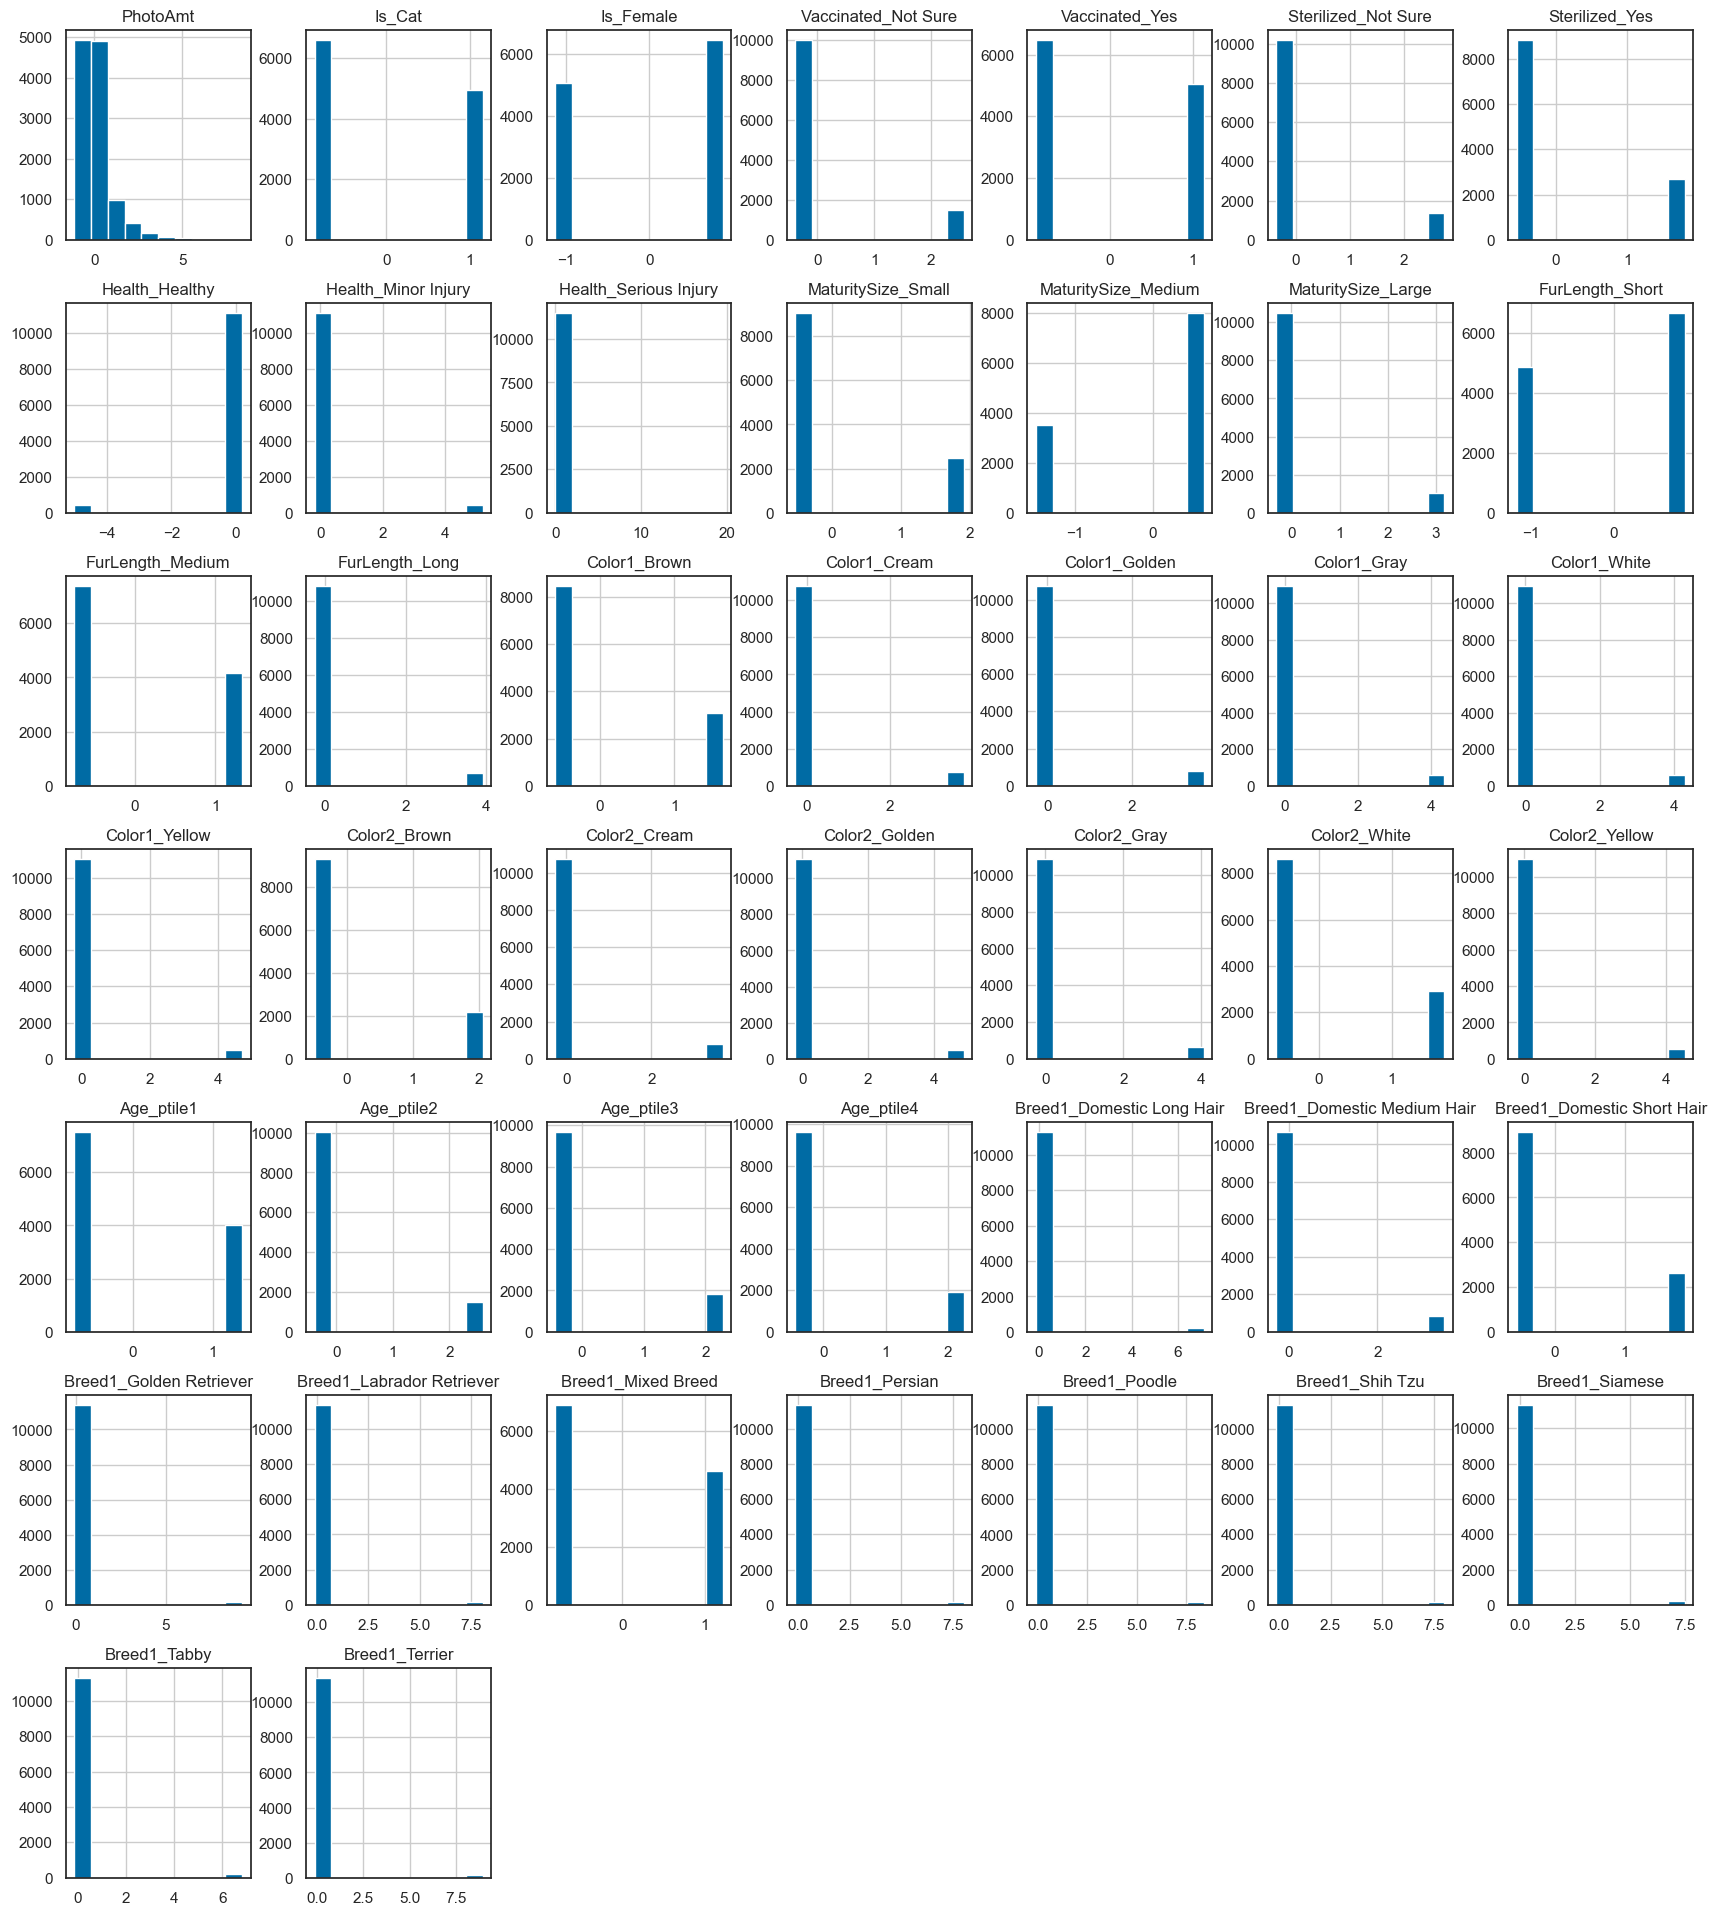

In [426]:
features.hist(figsize=(21,24))

In [427]:
features

,PhotoAmt,Is_Cat,Is_Female,Vaccinated_Not Sure,Vaccinated_Yes,Sterilized_Not Sure,Sterilized_Yes,Health_Healthy,Health_Minor Injury,Health_Serious Injury,...,Breed1_Domestic Short Hair,Breed1_Golden Retriever,Breed1_Labrador Retriever,Breed1_Mixed Breed,Breed1_Persian,Breed1_Poodle,Breed1_Shih Tzu,Breed1_Siamese,Breed1_Tabby,Breed1_Terrier
0,-0.829726,1.156374,-1.129152,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,6.831508,-0.112024
1,-0.511849,1.156374,-1.129152,2.571888,-0.883832,2.754961,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
2,1.077536,-0.864697,-1.129152,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
3,1.395413,-0.864697,0.885544,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
4,-0.193972,-0.864697,-1.129152,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,1.221557,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,-1.147603,-0.864697,-1.129152,2.571888,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,8.40549,-0.125176,-0.133489,-0.146368,-0.112024
11533,-0.829726,1.156374,0.885544,-0.388786,-0.883832,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,1.851619,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
11534,-0.829726,-0.864697,0.885544,-0.388786,1.131339,-0.362950,-0.552326,0.19888,-0.191705,-0.051058,...,-0.540021,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024
11535,-0.193972,1.156374,0.885544,-0.388786,1.131339,-0.362950,1.810368,0.19888,-0.191705,-0.051058,...,1.851619,-0.107989,-0.1241,-0.818556,-0.124818,-0.11896,-0.125176,-0.133489,-0.146368,-0.112024


In [428]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9229, 44), (2308, 44), (9229,), (2308,))

In [429]:
y_train


3527     1
6377     0
8256     1
916      0
5972     0
        ..
11284    1
5191     1
5390     1
860      1
7270     1
Name: Adopted, Length: 9229, dtype: int32

In [430]:
X_train.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
PhotoAmt,9229.0,0.00,1.00,-1.15,-0.51,-0.19,0.44,8.39
Is_Cat,9229.0,-0.00,1.00,-0.86,-0.86,-0.86,1.16,1.16
Is_Female,9229.0,0.00,1.00,-1.13,-1.13,0.89,0.89,0.89
Vaccinated_Not Sure,9229.0,0.01,1.01,-0.39,-0.39,-0.39,-0.39,2.57
Vaccinated_Yes,9229.0,-0.01,1.00,-0.88,-0.88,-0.88,1.13,1.13
Sterilized_Not Sure,9229.0,0.01,1.01,-0.36,-0.36,-0.36,-0.36,2.75
Sterilized_Yes,9229.0,0.01,1.00,-0.55,-0.55,-0.55,-0.55,1.81
Health_Healthy,9229.0,0.01,0.98,-5.03,0.20,0.20,0.20,0.20
Health_Minor Injury,9229.0,-0.01,0.98,-0.19,-0.19,-0.19,-0.19,5.22
Health_Serious Injury,9229.0,-0.00,0.98,-0.05,-0.05,-0.05,-0.05,19.58


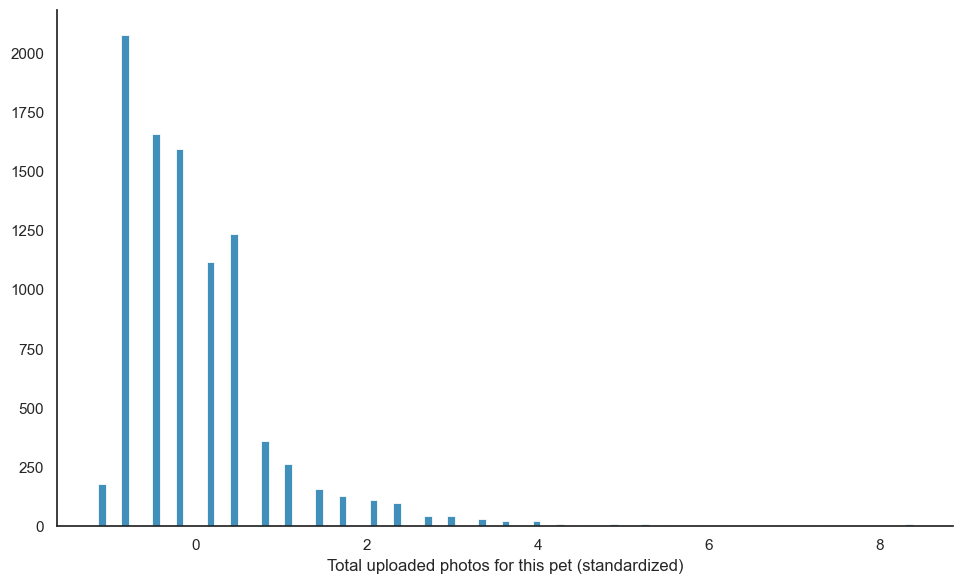

In [431]:
g = sns.displot(X_train['PhotoAmt'], height=6, aspect=10/6) # 히스토그램 그리기
g.set_axis_labels('Total uploaded photos for this pet (standardized)', '') # 오른쪽 레이블 제거
g.set_titles('')

In [432]:
y = y_train.values

X = X_train['PhotoAmt'].values
X = sm.add_constant(X)

X.shape, y.shape


((9229, 2), (9229,))

In [433]:
y[:5]

array([1, 0, 1, 0, 0])

In [434]:
X[:5]

array([[ 1.        , -0.19397188],
       [ 1.        , -0.19397188],
       [ 1.        , -0.82972574],
       [ 1.        , -0.51184881],
       [ 1.        ,  0.44178198]])

In [435]:
# Describe model
m1_sm = sm.Logit(y, X)
# Fit model
res_sm = m1_sm.fit()

# Summarise model
print(res_sm.summary())

Optimization terminated successfully.
         Current function value: 0.571398
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 9229
Model:                          Logit   Df Residuals:                     9227
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                 0.01015
Time:                        14:31:22   Log-Likelihood:                -5273.4
converged:                       True   LL-Null:                       -5327.5
Covariance Type:            nonrobust   LLR p-value:                 2.430e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0432      0.024     43.404      0.000       0.996       1.090
x1             0.2858      0.

In [436]:
print("Parameters: ", [np.around(val, 2) for val in res_sm.params]) # Parameters
print("Standard errors: ", [np.round(val, 2) for val in res_sm.bse]) # Standard Deviation 
print("Predicted values: ", [np.round(val, 2) for val in res_sm.predict()[:10]]) # Prediction values, up to 10

Parameters:  [1.04, 0.29]
Standard errors:  [0.02, 0.03]
Predicted values:  [0.73, 0.73, 0.69, 0.71, 0.76, 0.69, 0.69, 0.71, 0.69, 0.69]


In [437]:
pd.concat([pd.Series(res_sm.predict(X)), pd.Series(expit(res_sm.fittedvalues))], axis=1).rename({0: 'Predicted', 1: 'Inverse Logit(Fitted)'}, axis=1)

,Predicted,Inverse Logit(Fitted)
0,0.728644,0.728644
1,0.728644,0.728644
2,0.691268,0.691268
3,0.710313,0.710313
4,0.763046,0.763046
...,...,...
9224,0.847425,0.847425
9225,0.710313,0.710313
9226,0.746229,0.746229
9227,0.847425,0.847425


In [438]:
res_sm_margeff = res_sm.get_margeff() # Marginal effects -> 독립변수가 1단위 변화할 때 종속변수의 변화량
print(res_sm_margeff.summary())


        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0549      0.006      9.710      0.000       0.044       0.066


Text(0.5, 1.0, 'Logistic Regression')

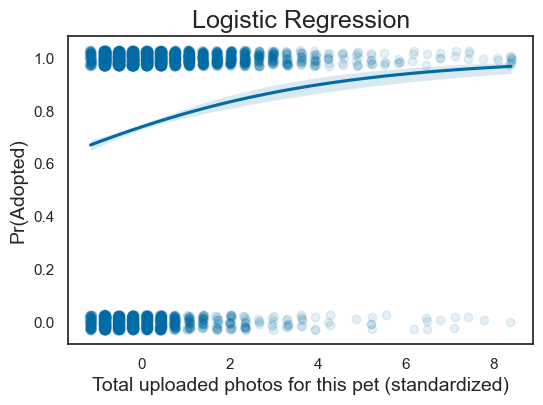

In [439]:
fig, ax = plt.subplots(figsize=(6, 4)) # Figure size, axiss size 6,4. subplots -> 여러개의 그래프를 하나의 플롯에 그리기 위해 사용
sns.regplot(x='PhotoAmt', y='Adopted', data=X_train.join(pd.Series(labels, name='Adopted')), # regression plot, X는 photoamt, y는 adpoted. data는 X_train에 레이블 추가
            logistic=True, n_boot=500, x_jitter=.03, y_jitter=.03, # logistic=True -> 로지스틱 회귀 모델 사용, n_boot=500 -> 부트스트랩 샘플링 횟수, x_jitter=.03, y_jitter=.03 -> 데이터 흩뿌리기
            scatter_kws = {'alpha': 0.10}, # set transparency to 10%
            ax=ax) # ax=ax 이유는 그래프를 하나의 플롯에 그리기 위해 사용. 여기서 ax는 그래프를 그리는 영역을 지정하는 것. ax는 무엇의 약자? -> axis의 약자
ax.set_ylabel('Pr(Adopted)', fontsize=14) # y축 레이블 설정.
ax.set_xlabel('Total uploaded photos for this pet (standardized)', fontsize=14)
ax.set_title('Logistic Regression', fontsize=18)


In [440]:
def rand_jitter(arr): # 데이터 흩뿌리기
    stdev = .01 * (max(arr) - min(arr)) # 여기서 arr는 데이터 흩뿌리기 정도를 결정하는 값. 0.01은 데이터 흩뿌리기 정도를 결정하는 값. arr는 무엇의 약자? -> array의 약자
    return arr + np.random.randn(len(arr)) * stdev # array가 데이터 흩뿌리기에 사용되는 이유 ->
 


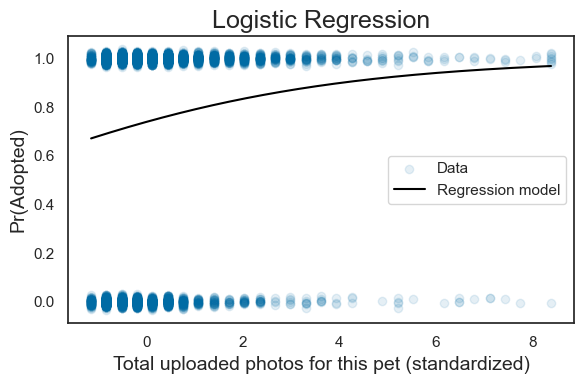

In [441]:
x = np.linspace(X_train['PhotoAmt'].min(), X_train['PhotoAmt'].max(), 1000) # linspace -> 일정한 간격으로 숫자를 생성하는 함수. X_train['PhotoAmt']의 최소값과 최대값사이에 1000개의 숫자를 생성
y = res_sm.predict(pd.DataFrame({'const': 1, 'PhotoAmt': x})) # 예측값 계산. 여기서 const는 상수항. 상수항은 1로 설정. PhotoAmt는 독립변수.
f = interp1d(x, y, kind='cubic') # 예측값을 곡선으로 그리기 위해 사용. kind='cubic' -> 3차 다항식 사용
xnew = np.linspace(X_train['PhotoAmt'].min(), X_train['PhotoAmt'].max(), 1000)
ynew = f(xnew)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(X_train['PhotoAmt'], rand_jitter(y_train), alpha=0.1, label='Data') # 데이터 흩뿌리기
plt.plot(xnew, ynew, color='black', label='Regression model')

ax.set_ylabel('Pr(Adopted)', fontsize=14)
ax.set_xlabel('Total uploaded photos for this pet (standardized)', fontsize=14)
ax.legend(fontsize=11)
ax.set_title('Logistic Regression', fontsize=18)

fig.tight_layout();




In [442]:
X_tests = X_test['PhotoAmt'].values
X_tests = sm.add_constant(X_tests)

X_tests[:10]


array([[ 1.        , -0.82972574],
       [ 1.        ,  1.07753583],
       [ 1.        , -0.19397188],
       [ 1.        , -0.51184881],
       [ 1.        ,  0.75965891],
       [ 1.        , -0.82972574],
       [ 1.        , -0.19397188],
       [ 1.        , -0.82972574],
       [ 1.        , -0.19397188],
       [ 1.        , -1.14760267]])

In [443]:
y_pred_probs = res_sm.predict(exog=X_tests)

y_pred_probs[:10]

array([0.69126789, 0.79431764, 0.72864376, 0.71031265, 0.77907791,
       0.69126789, 0.72864376, 0.69126789, 0.72864376, 0.67155004])

In [444]:
y_preds = list(map(round, y_pred_probs))

y_preds[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

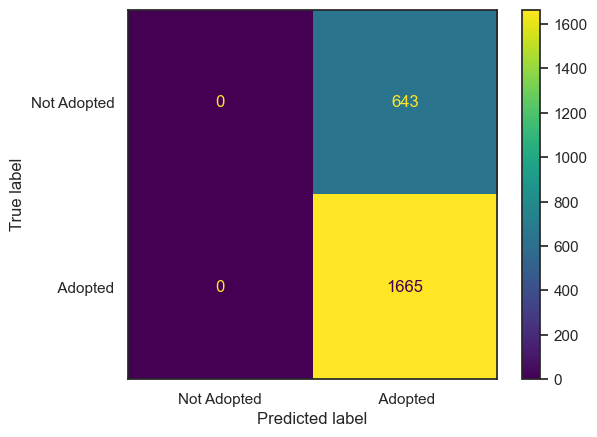

In [445]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Adopted',' Adopted'])
disp.plot()

In [446]:
print(classification_report(y_test, y_preds, target_names=['Not Adopted',' Adopted'])) # Pretty bad result


              precision    recall  f1-score   support

 Not Adopted       0.00      0.00      0.00       643
     Adopted       0.72      1.00      0.84      1665

    accuracy                           0.72      2308
   macro avg       0.36      0.50      0.42      2308
weighted avg       0.52      0.72      0.60      2308



C:\Users\TaeyoonKim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TaeyoonKim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TaeyoonKim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classif

In [447]:
test_accuracy_sm = accuracy_score(y_test, y_preds)
print('Test set (aka out-of-sample) Accuracy: {:.3f}'.format(test_accuracy_sm))

Test set (aka out-of-sample) Accuracy: 0.721


In [448]:
test_precision_sm = precision_score(y_test, y_preds)
print('Test set (aka out-of-sample) Precision: {:.3f}'.format(test_precision_sm))

Test set (aka out-of-sample) Precision: 0.721


In [449]:
test_recall_sm = recall_score(y_test, y_preds)
print('Test set (aka out-of-sample) Recall: {:.3f}'.format(test_recall_sm))

Test set (aka out-of-sample) Recall: 1.000


In [450]:
dataframe = pd.read_csv('data/petfinder-mini.csv')
dataframe.head()

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150,"Good guard dog, very alert, active, obedience ...",8,2
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0,This handsome yet cute boy is up for adoption....,3,2


In [451]:
# In the original dataset, `'AdoptionSpeed'` of `4` indicates
# a pet was not adopted.
dataframe['target'] = np.where(dataframe['AdoptionSpeed']==4, 0, 1)

# Drop unused features.
dataframe = dataframe.drop(columns=['AdoptionSpeed', 'Description'])

In [452]:
train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])

In [453]:
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


9229 training examples
1154 validation examples
1154 test examples


In [454]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy() # 데이터프레임 복사. 왜냐하면 원본 데이터프레임을 변경하지 않기 위해서.
    labels = df.pop('target') # 레이블 제거
    df = {key: value[:, tf.newaxis] for key, value in dataframe.items()} # key: 컬럼명, value: 컬럼값. value[:, tf.newaxis] 각각의 items() # 여기서 tf.newaxis는 어디서 나온거지? -> tensorflow의 새로운 차원을 추가하는 함수
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels)) # ds는 tf.data.Dataset의 텐서 슬라이스 객체. 딕셔너리 형태로 데이터를 저장.
    if shuffle:
        ds = ds.shuffle(buffer_size = len(dataframe)) # 데이터를 무작위로 섞음
    ds = ds.batch(batch_size) # 배치 크기
    ds = ds.prefetch(batch_size) # 배치 크기만큼 미리 데이터를 가져옴
    return ds
                                            
    

In [455]:
def get_normalization_layer(name, dataset):
    normalizer = layers.Normalization(axis=None)
    feature_ds = dataset.map(lambda x, y: x[name])
    normalizer.adapt(feature_ds)
    
    return normalizer


In [456]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    if dtype == 'string': # 만약 dtype이 string이면
        index = layers.StringLookup(max_tokens=max_tokens) # 인덱스는 layers.StringLookup 객체. max_tokens는 최대 토큰 수.
    else:
        index = layers.IntegerLookup(max_tokens=max_tokens) # 만약 dtype이 integer이면
        
    feature_ds = dataset.map(lambda x, y: x[name]) #features_ds는 dataset에서 map함수를 사용하여 name을 키로 하는 데이터를 가져옴
    index.adapt(feature_ds) # 인덱스에 adapt함수를 사용하여 feature_ds를 적응시킴
    encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size()) # 인코더는 layers.CategoryEncoding 객체. num_tokens는 인덱스의 토큰 수.
    
    return lambda feature: encoder(index(feature)) # 인덱스에 인코더를 적용하여 카테고리 인고딩 수행. 







In [457]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size = batch_size) 
val_ds = df_to_dataset(val, shuffle=False, batch_size = batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size = batch_size)


C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_2816\2859088374.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()} # key: 컬럼명, value: 컬럼값. value[:, tf.newaxis] 각각의 items() # 여기서 tf.newaxis는 어디서 나온거지? -> tensorflow의 새로운 차원을 추가하는 함수
C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_2816\2859088374.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()} # key: 컬럼명, value: 컬럼값. value[:, tf.newaxis] 각각의 items() # 여기서 tf.newaxis는 어디서 나온거지? -> tensorflow의 새로운 차원을 추가하는 함수
C:\Users\TaeyoonKim\AppData\Local\Temp\ipykernel_2816\2859088374.py:4: FutureWarning: Support for multi-dimensional inde

In [458]:
all_inputs = []
encoded_features = []

for header in ['PhotoAmt', 'Fee']: # photoamt와 fee를 각각 header로 지정
    numberic_col = tf.keras.Input(shape=(1,), name=header) # numberic_column은 tf.keras의 input 객체. shape는 데이터의 형태. name은 컬럼명.
    normalization_layer = get_normalization_layer(header, train_ds) # 정규화 레이어는 get_normalization_layer 함수를 사용하여 생성
    encoded_numeric_col = normalization_layer(numberic_col) # 정규화 레이어에 numberic_col을 적용
    all_inputs.append(numberic_col) # 모든 입력 피쳐 저장
    encoded_features.append(encoded_numeric_col) # 모든 인코딩 피쳐 저장






In [ ]:
age_col = tf.keras.Input(shape=(1,), name='Age', dtype='int64') # age_col은 tf.keras의 input 객체. shape는 데이터의 형태. name은 컬럼명. dtype은 데이터의 형태.

encoding_layer = get_category_encoding_layer(name='Age',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_age_col = encoding_layer(age_col)
all_inputs.append(age_col)
encoded_features.append(encoded_age_col)

In [460]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation='relu')(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [462]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])